# Guppy Multiple Moving Average (GMMA)

https://www.investopedia.com/terms/g/guppy-multiple-moving-average.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
import talib as ta

In [4]:
# Short-term for EMA
df['EMA3'] = ta.EMA(df['Adj Close'], timeperiod=3)
df['EMA5'] = ta.EMA(df['Adj Close'], timeperiod=5)
df['EMA8'] = ta.EMA(df['Adj Close'], timeperiod=8)
df['EMA10'] = ta.EMA(df['Adj Close'], timeperiod=10)
df['EMA12'] = ta.EMA(df['Adj Close'], timeperiod=12)
df['EMA15'] = ta.EMA(df['Adj Close'], timeperiod=15)

In [5]:
# Long-term for EMA
df['EMA30'] = ta.EMA(df['Adj Close'], timeperiod=30)
df['EMA35'] = ta.EMA(df['Adj Close'], timeperiod=35)
df['EMA40'] = ta.EMA(df['Adj Close'], timeperiod=40)
df['EMA45'] = ta.EMA(df['Adj Close'], timeperiod=45)
df['EMA50'] = ta.EMA(df['Adj Close'], timeperiod=50)
df['EMA60'] = ta.EMA(df['Adj Close'], timeperiod=60)

In [6]:
EMA_Short = df[['EMA3','EMA5','EMA8','EMA10','EMA12','EMA15']]
EMA_Long = df[['EMA30','EMA35','EMA40','EMA45','EMA50','EMA60']]

In [7]:
# Short-term for SMA
df['SMA3'] = ta.SMA(df['Adj Close'], timeperiod=3)
df['SMA5'] = ta.SMA(df['Adj Close'], timeperiod=5)
df['SMA8'] = ta.SMA(df['Adj Close'], timeperiod=8)
df['SMA10'] = ta.SMA(df['Adj Close'], timeperiod=10)
df['SMA12'] = ta.SMA(df['Adj Close'], timeperiod=12)
df['SMA15'] = ta.SMA(df['Adj Close'], timeperiod=15)

In [8]:
# Long-term for SMA
df['SMA30'] = ta.SMA(df['Adj Close'], timeperiod=30)
df['SMA35'] = ta.SMA(df['Adj Close'], timeperiod=35)
df['SMA40'] = ta.SMA(df['Adj Close'], timeperiod=40)
df['SMA45'] = ta.SMA(df['Adj Close'], timeperiod=45)
df['SMA50'] = ta.SMA(df['Adj Close'], timeperiod=50)
df['SMA60'] = ta.SMA(df['Adj Close'], timeperiod=60)

In [9]:
SMA_Short = df[['SMA3','SMA5','SMA8','SMA10','SMA12','SMA15']]
SMA_Long = df[['SMA30','SMA35','SMA40','SMA45','SMA50','SMA60']]

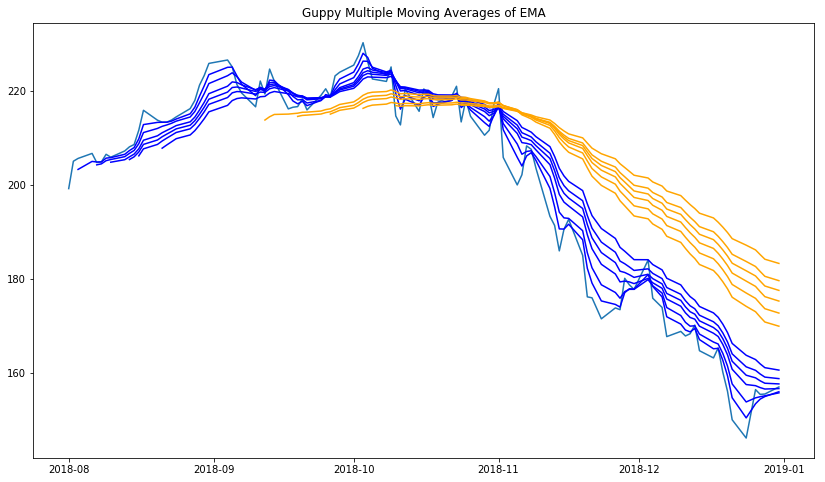

In [10]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(EMA_Short, color='blue')
plt.plot(EMA_Long, color='orange')
plt.title('Guppy Multiple Moving Averages of EMA')
plt.show()

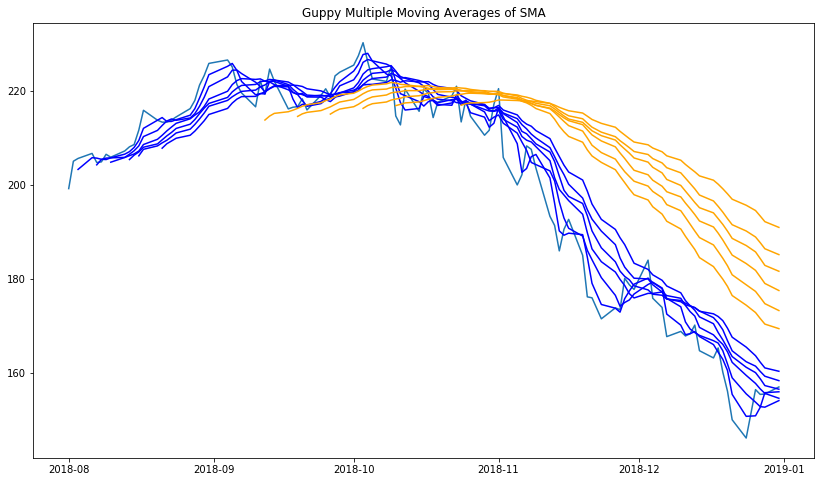

In [11]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(SMA_Short, color='blue')
plt.plot(SMA_Long, color='orange')
plt.title('Guppy Multiple Moving Averages of SMA')
plt.show()

## Candlestick with GMMA

In [12]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA3,EMA5,EMA8,...,SMA10,SMA12,SMA15,SMA30,SMA35,SMA40,SMA45,SMA50,SMA60,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,203.323542,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,205.025930,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,204.908099,204.297842,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Text(0.5,0,'Date')

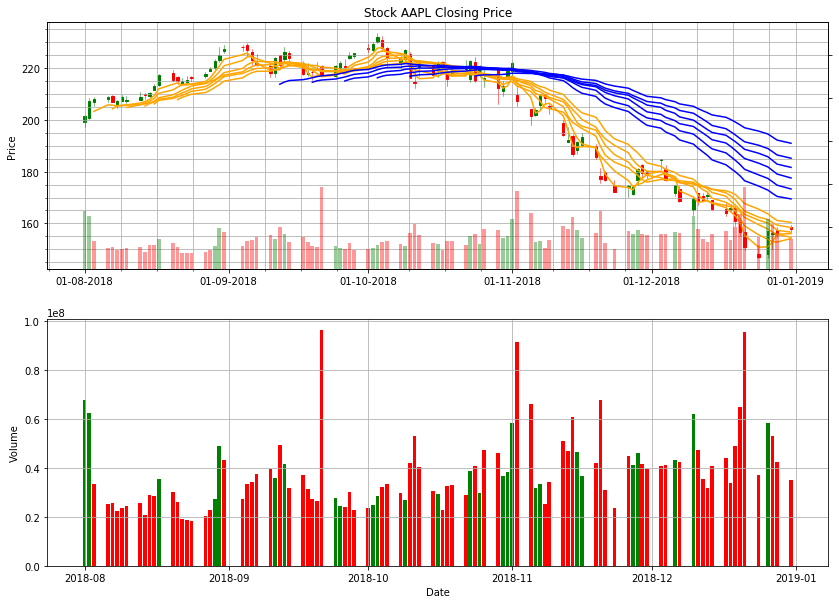

In [13]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(SMA_Short, color='orange')
ax1.plot(SMA_Long, color='blue')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
df['VolumePositive'] = df['Open'] < df['Adj Close']
ax2.bar(df.index, df['Volume'], color=df.VolumePositive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

Text(0.5,0,'Date')

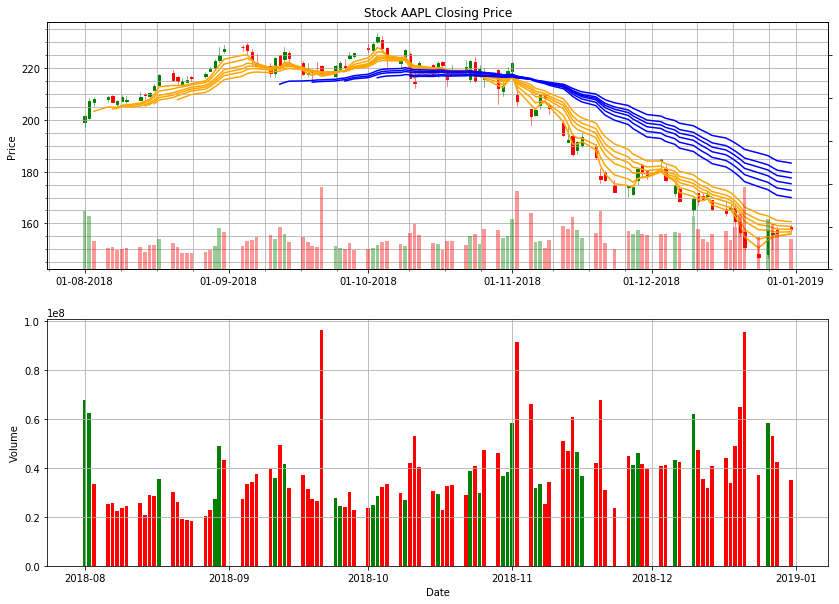

In [14]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(EMA_Short, color='orange')
ax1.plot(EMA_Long, color='blue')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
df['VolumePositive'] = df['Open'] < df['Adj Close']
ax2.bar(df.index, df['Volume'], color=df.VolumePositive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')